In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pydataset as data
from sklearn.cluster import KMeans

## Introduction: KMeans clustering algorithm

* Unsupervised Algorithm
* Search for a pre-determined number of clusters within an unlabeled dataset
* k = number of clusters (user specified)
* Distance based

### How K-means algorithm works:

Step 1: Randomly choose k starting centers

Step 2: Cluster Assignment:
Assign each observation to nearest Center (based on distance). Observations assigned to a center are part of a cluster.

Step 3: Move Centeroids:
Recalculate new centroids location (mean of observations within a cluster).

Step 4: Keep repeating step 2 and 3 until centers do no move.

### Sklearn implementation

In [2]:
from pydataset import data

#import data
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_wdith', 'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_wdith,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
# define independent variables for k-means

X = iris[['sepal_length', 'petal_length']]
X.head()

,sepal_length,petal_length
1,5.1,1.4
2,4.9,1.4
3,4.7,1.3
4,4.6,1.5
5,5.0,1.4


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'petal_length'}>]], dtype=object)

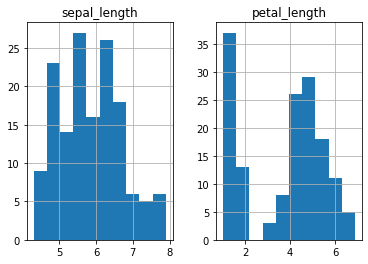

In [6]:
# look at distribution of speal length and petal length

X.hist()

In [9]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [12]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

#fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

In [13]:
# make new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [14]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_wdith,species,cluster
37,5.5,3.5,1.3,0.2,setosa,1
75,6.4,2.9,4.3,1.3,versicolor,2
109,6.7,2.5,5.8,1.8,virginica,0
32,5.4,3.4,1.5,0.4,setosa,1
108,7.3,2.9,6.3,1.8,virginica,0
95,5.6,2.7,4.2,1.3,versicolor,2
27,5.0,3.4,1.6,0.4,setosa,1
126,7.2,3.2,6.0,1.8,virginica,0
101,6.3,3.3,6.0,2.5,virginica,0
117,6.5,3.0,5.5,1.8,virginica,0


In [15]:
# Visualize the scatter plot for Actual vs predicted (K-Means)

viz_kmeans.viz_iris(iris, kmeans)

NameError: name 'viz_kmeans' is not defined

### Attributes for Kmeans:

* cluster_centers_:

In [16]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 1.22961906,  1.02844019],
       [-1.01511749, -1.22865676],
       [ 0.03665519,  0.41744409]])

In [18]:
# Make a dataframe
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_length,petal_length
0,1.229619,1.028440
1,-1.015117,-1.228657
2,0.036655,0.417444


In [20]:
# Centroids for unscaled data?
centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()
centroids

/var/folders/jl/s3ptdwdx55v01d2g2wrs7vdc0000gn/T/ipykernel_25185/2980728428.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()


,sepal_length,petal_length
cluster,,
0,6.858140,5.567442
1,5.005556,1.596296
2,5.873585,4.492453


In [21]:
# How to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

array([[6.85813953, 5.56744186],
       [5.00555556, 1.5962963 ],
       [5.87358491, 4.49245283]])

In [22]:
# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

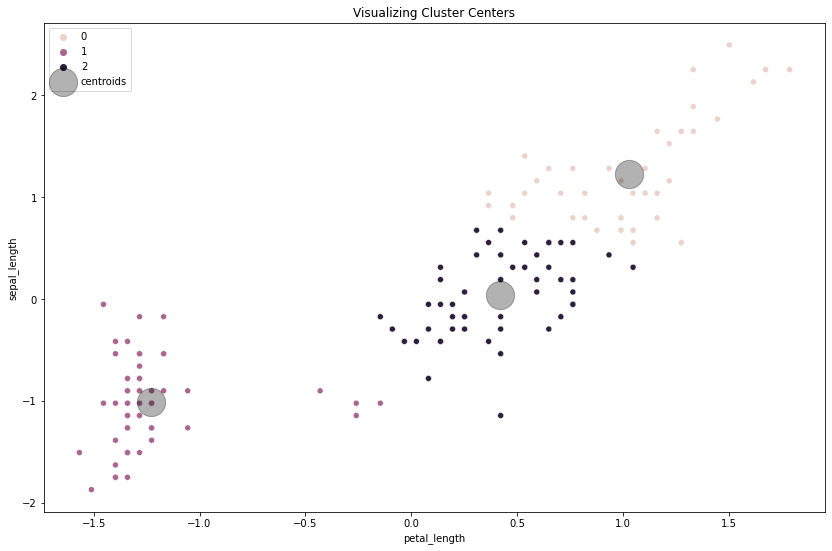

In [23]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14,9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y='sepal_length', data = X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_length', y='sepal_length',
                             ax = plt.gca(),
                             s = 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend()

In [24]:
# to avoid Seaborn 'hue' issue with integers:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_wdith,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


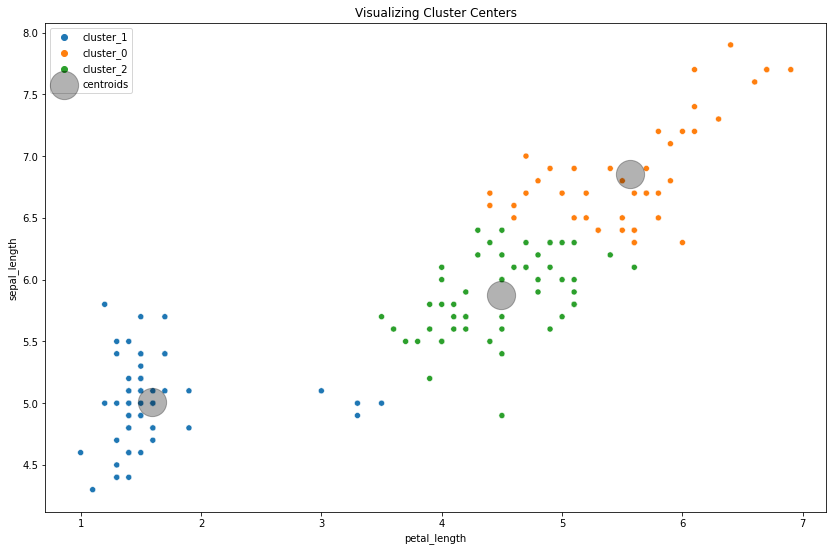

In [25]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y ='sepal_length', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_length', y = 'sepal_length',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

### Look at two cluster (i.e k =2)

In [ ]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X])

In [ ]:
# lets look at two clusters (i.e k =2)

kmeans = KMeans(n_clusters =2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_length', y='sepal_length', data = X_scaled, hue = 'cluster')

### How to choose K

#### A-prior knowledge  about application domain/educated guess
* How many five different ytpes of bacteria in the world (k=5)
* There are two different kidns of peopl ein world (k=2)

#### Search for a 'good' k value
* Try different k values and evaluate results
    * Inertia = sum of squared distances from each point to it's assigned centroid
    * minimize inertia(?)
    * Use elbow method (using inertia) to choose k
    
#### Use hierarchical clustering
* Try on a subset of data and guess k

In [ ]:
# kmeans object has 'inertia' attribute
kmeans.inertia_

In [ ]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transfrom(X), columns=X.columns).set_index([X.index.va])

k = 2

kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)
kmeans.inertia_

In [ ]:
# inertia with k=3
k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)
kmeans.inertia_

In [ ]:
# lets 

In [ ]:
# What value of k is appropriate?

fig, axs = plt.subplots(2,2, figsize=(13,13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans

In [ ]:
# Challenges:

# Which features should I use to create clusters?
# What k should I select?
# Are clusters meaningful and provide any value?